In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
np.random.randint(1,7)

2

In [17]:
few_rolls  = np.random.randint(1,7,size=10)
many_rolls = np.random.randint(1,7,size=1000)

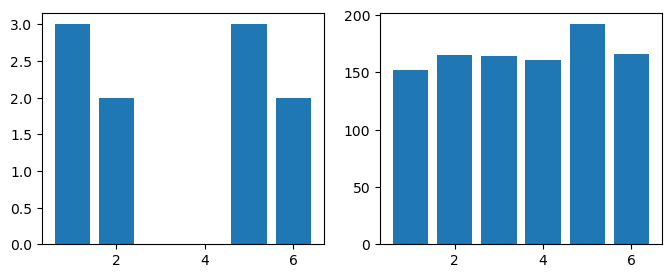

In [18]:
few_counts  = np.histogram(few_rolls,  bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))
ax1.bar(np.arange(1,7), few_counts)
ax2.bar(np.arange(1,7), many_counts);

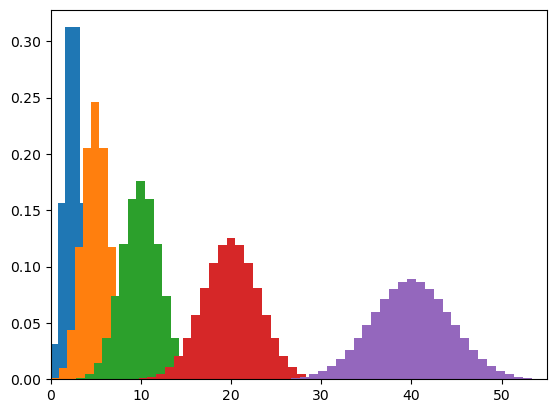

In [19]:
import scipy.stats as ss

b = ss.distributions.binom
for flips in [5, 10, 20, 40, 80]:
    # binomial with .5 is result of many coin flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)
plt.xlim(0,55);

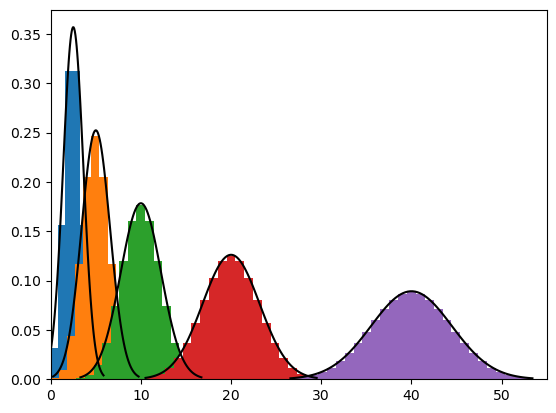

In [20]:
b = ss.distributions.binom
n = ss.distributions.norm

for flips in [5, 10, 20, 40, 80]:
    # binomial coint flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)

    # normal approximation to that binomial
    # we have to set the mean and standard deviation
    mu      = flips * .5, 
    std_dev = np.sqrt(flips * .5 * (1-.5))
    
    # we have to set up both the x and y points for the normal
    # we get the ys from the distribution (a function)
    # we have to feed it xs, we set those up here
    norm_x = np.linspace(mu-3*std_dev, mu+3*std_dev, 100)
    norm_y = n.pdf(norm_x, mu, std_dev)
    plt.plot(norm_x, norm_y, 'k');

plt.xlim(0,55);

In [21]:
(2 * 12.50) + (12 * .5) + (3 * 1.75)

36.25

In [22]:
2 + 12 + 3

17

In [23]:
# pure python, old-school
quantity = [2, 12, 3]
costs    = [12.5, .5, 1.75]
partial_cost = []
for q,c in zip(quantity, costs):
    partial_cost.append(q*c)
sum(partial_cost)

36.25

In [24]:
# pure python, for the new-school, cool kids
quantity = [2, 12, 3]
costs    = [12.5, .5, 1.75]
sum(q*c for q,c in zip(quantity,costs))

36.25

In [25]:
quantity = np.array([2, 12, 3]) 
costs    = np.array([12.5, .5, 1.75])
np.sum(quantity * costs) # element-wise multiplication

36.25

In [26]:
print(quantity.dot(costs),       # dot-product way 1
      np.dot(quantity, costs),   # dot-product way 2 
      quantity @ costs,          # dot-product way 3 
                                 # (new addition to the family!)
      sep='\n')

36.25
36.25
36.25


In [27]:
for q_i, c_i in zip(quantity, costs):
    print("{:2d} {:5.2f} --> {:5.2f}".format(q_i, c_i, q_i * c_i))

print("Total:", 
      sum(q*c for q,c in zip(quantity,costs))) # cool-kid method

 2 12.50 --> 25.00
12  0.50 -->  6.00
 3  1.75 -->  5.25
Total: 36.25


In [28]:
values  = np.array([10.0, 20.0, 30.0])
weights = np.full_like(values, 1/3) # repeated (1/3)

print("weights:", weights)
print("via mean:", np.mean(values))
print("via weights and dot:", np.dot(weights, values))

weights: [0.33333333 0.33333333 0.33333333]
via mean: 20.0
via weights and dot: 20.0


In [29]:
values  = np.array([10,  20,  30])
weights = np.array([.5, .25, .25])

np.dot(weights, values)

17.5

In [30]:
                  # odd, even
payoffs = np.array([1.0, -.5])
probs   = np.array([ .5,  .5])
np.dot(payoffs, probs)

0.25

In [31]:
def is_even(n):
    # if remainder 0, value is even
    return n % 2 == 0  

winnings = 0.0
for toss_ct in range(10000):
    die_toss = np.random.randint(1,7)
    winnings += 1.0 if is_even(die_toss) else -0.5
print(winnings)

2605.0


In [32]:
values = np.array([5, -3, 2, 1])
squares = values * values # element wise multiplication
print(squares, 
      np.sum(squares),   # sum-of-squares.  ha!
      np.dot(values, values), sep="\n")

[25  9  4  1]
39
39


In [36]:
errors = np.array([5, -5, 3.2, -1.1])
display(pd.DataFrame({'errors':errors,
                      'squared':errors*errors}))

,errors,squared
0,5.0,25.00
1,-5.0,25.00
2,3.2,10.24
3,-1.1,1.21


In [37]:
np.dot(errors, errors)

61.45

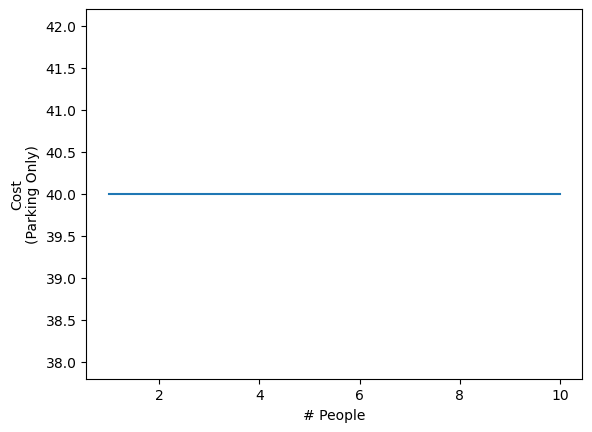

In [38]:
people = np.arange(1,11)
total_cost = np.ones_like(people) * 40.0

ax = plt.gca()

ax.plot(people, total_cost)
ax.set_xlabel("# People")
ax.set_ylabel("Cost\n(Parking Only)");

In [39]:
people = np.arange(1,11)
total_cost = 80.0 * people + 40.0

In [46]:
# .T (transpose) to save vertical space in print out
display(pd.DataFrame({'total_cost':total_cost.astype(np.int_)}, 
                     index=people).T)

,1,2,3,4,5,6,7,8,9,10
total_cost,120,200,280,360,440,520,600,680,760,840


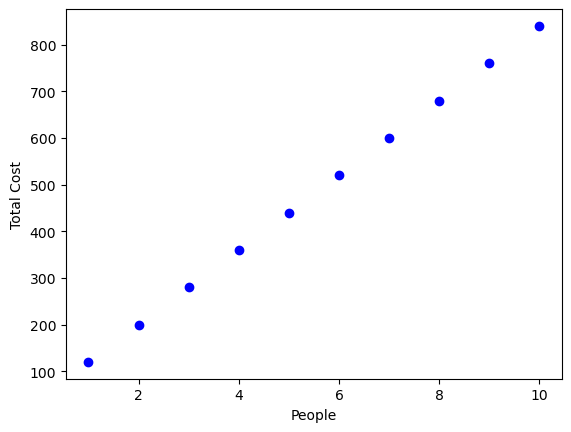

In [47]:
ax = plt.gca()
ax.plot(people, total_cost, 'bo')
ax.set_ylabel("Total Cost")
ax.set_xlabel("People");

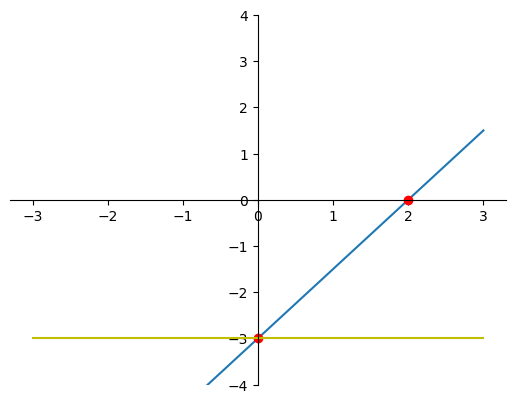

In [49]:
def high_school_style(ax):
    ' helper to define an axis to look like a typical school plot '
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# paint by number
# create 100 x values from -3 to 3
xs = np.linspace(-3, 3, 100)

# slope (m) and intercept (b)
m, b = 1.5, -3

ax = plt.gca()

ys = m*xs + b
ax.plot(xs, ys)

ax.set_ylim(-4,4)
high_school_style(ax) # helper from mlwpy.py

ax.plot(0, -3,'ro') # y-intercept
ax.plot(2,  0,'ro') # two steps right gives three steps up

# y = mx + b with m=0 gives y = b
ys = 0*xs + b
ax.plot(xs, ys, 'y');

In [50]:
# np.c_[] lets us create an array column-by-column
xs    = np.linspace(-3, 3, 100)
xs_p1 = np.c_[xs, np.ones_like(xs)]

# view the first few rows
display(pd.DataFrame(xs_p1).head())

,0,1
0,-3.000000,1.0
1,-2.939394,1.0
2,-2.878788,1.0
3,-2.818182,1.0
4,-2.757576,1.0


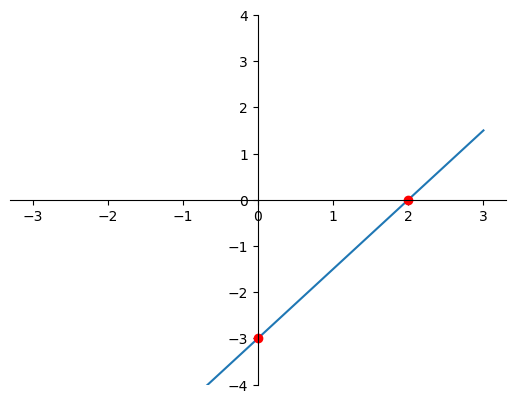

In [51]:
w     = np.array([1.5, -3])
ys    = np.dot(xs_p1, w)


ax = plt.gca()
ax.plot(xs, ys)

# styling
ax.set_ylim(-4,4)
high_school_style(ax)

ax.plot(0, -3,'ro')  # y-intercept
ax.plot(2,  0,'ro'); # two steps to the right should be three whole steps up

In [52]:
number_people = np.arange(1,11) # 1-10 people
number_rbs    = np.arange(0,20) # 0-19 rootbeers

# numpy tool to get cross-product of values (each against each)
# in two paired arrays.  try out: np.meshgrid([0,1], [10,20])
# "perfect" for functions of multiple variables
number_people, number_rbs = np.meshgrid(number_people, number_rbs) 

total_cost = 80 * number_people + 10 * number_rbs + 40

(0.0, 1.0, 0.0, 1.0)

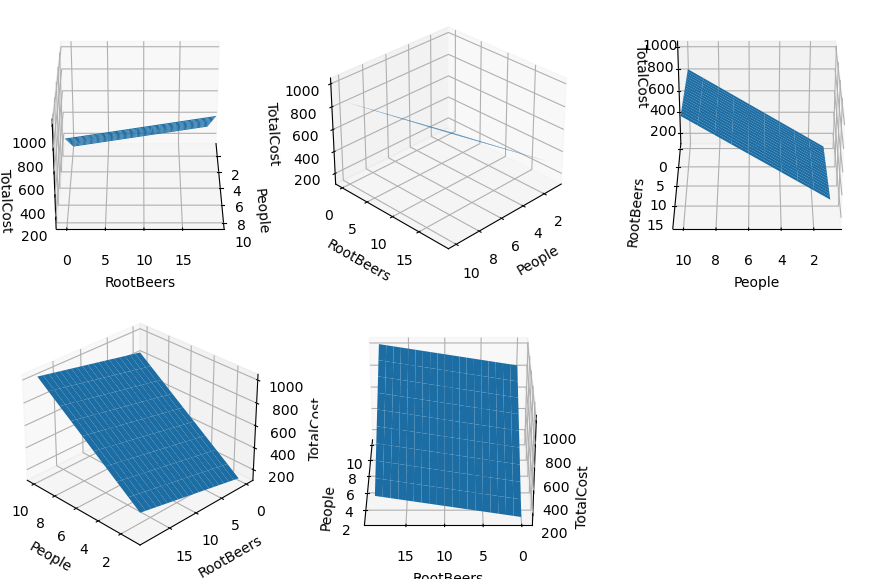

In [53]:
# import needed for 'projection':'3d'
from mpl_toolkits.mplot3d import Axes3D
fig,axes = plt.subplots(2, 3, 
                        subplot_kw={'projection':'3d'}, 
                        figsize=(9,6),
                        tight_layout=True)

angles = [0,45,90,135,180]
for ax,angle in zip(axes.flat, angles):
    ax.plot_surface(number_people, number_rbs, total_cost)
    ax.set_xlabel("People")
    ax.set_ylabel("RootBeers")
    ax.set_zlabel("TotalCost")
    ax.azim = angle

# we don't use the last axis
axes.flat[-1].axis('off')

In [54]:
number_people  = np.array([2,3])
number_rbs     = np.array([0,1,2])
number_hotdogs = np.array([2,4])

costs = np.array([80, 10, 5])

columns = ["People", "RootBeer", "HotDogs", "TotalCost"]

In [56]:
def np_cartesian_product(*arrays):
    ''' some numpy kung-fu to produce all
        possible combinations of input arrays '''
    ndim = len(arrays)
    return np.stack(np.meshgrid(*arrays), axis=-1).reshape(-1, ndim)

counts = np_cartesian_product(number_people, 
                              number_rbs, 
                              number_hotdogs)

totals = (costs[0] * counts[:,0] + 
          costs[1] * counts[:,1] + 
          costs[2] * counts[:,2] + 40)

display(pd.DataFrame(np.c_[counts, totals],
                     columns=columns).head(8))

,People,RootBeer,HotDogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,3,0,2,290
3,3,0,4,300
4,2,1,2,220
5,2,1,4,230
6,3,1,2,300
7,3,1,4,310


In [57]:
costs = np.array([80, 10, 5])
counts = np_cartesian_product(number_people, 
                              number_rbs, 
                              number_hotdogs)

totals = np.dot(counts, costs) + 40
display(pd.DataFrame(np.column_stack([counts, totals]), 
                     columns=columns).head(8))

,People,RootBeer,HotDogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,3,0,2,290
3,3,0,4,300
4,2,1,2,220
5,2,1,4,230
6,3,1,2,300
7,3,1,4,310


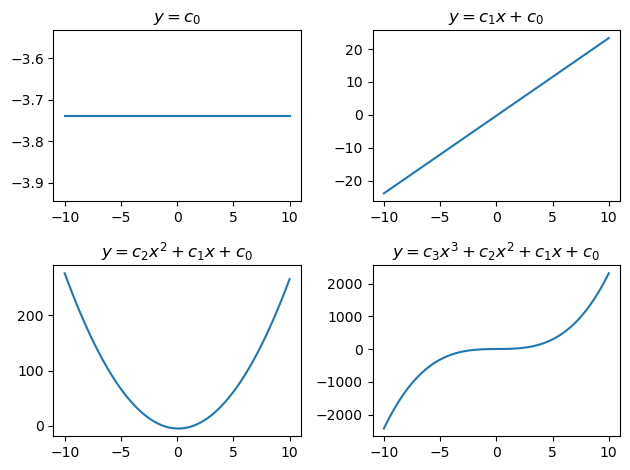

In [58]:
fig, axes = plt.subplots(2,2, tight_layout=True)

titles = ["$y=c_0$", 
          "$y=c_1x+c_0$",
          "$y=c_2x^2+c_1x+c_0$",
          "$y=c_3x^3+c_2x^2+c_1x+c_0$"]

xs = np.linspace(-10, 10, 100)
for power, (ax, title) in enumerate(zip(axes.flat, titles), 1):
    coeffs = np.random.uniform(-5, 5, power)
    poly = np.poly1d(coeffs)
    ax.plot(xs, poly(xs))
    ax.set_title(title)

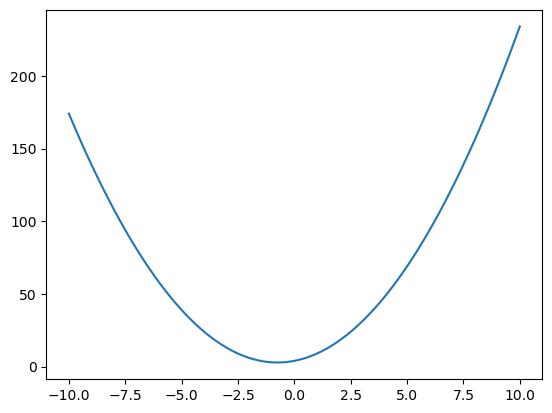

In [59]:
plt.Figure((2,1.5))

xs = np.linspace(-10,10,101)
coeffs = np.array([2,3,4])
ys = np.dot(coeffs, [xs**2, xs**1, xs**0])

# nice parabola via a dot-product
plt.plot(xs, ys);

In [60]:
oned_vec = np.arange(5)
print(oned_vec, "-->", oned_vec * oned_vec)
print("self dot:", np.dot(oned_vec, oned_vec))

[0 1 2 3 4] --> [ 0  1  4  9 16]
self dot: 30


In [61]:
row_vec = np.arange(5).reshape(1,5)
col_vec = np.arange(0, 50, 10).reshape(5,1)

In [62]:
print("row vec:", row_vec, 
      "col_vec:", col_vec, 
      "dot:", np.dot(row_vec, col_vec), sep='\n')

row vec:
[[0 1 2 3 4]]
col_vec:
[[ 0]
 [10]
 [20]
 [30]
 [40]]
dot:
[[300]]


In [63]:
out = np.dot(col_vec, row_vec)
print(out)

[[  0   0   0   0   0]
 [  0  10  20  30  40]
 [  0  20  40  60  80]
 [  0  30  60  90 120]
 [  0  40  80 120 160]]


In [64]:
out = np.dot(row_vec, col_vec)
out

array([[300]])

In [65]:
col_vec = np.arange(0, 50, 10).reshape(5,1)
row_vec = np.arange(0,5).reshape(1,5)

oned_vec = np.arange(5)

np.dot(oned_vec, col_vec)

array([300])

In [66]:
try: 
    np.dot(col_vec, oned_vec) # *boom*
except ValueError as e:  
    print("I went boom:", e)

I went boom: shapes (5,1) and (5,) not aligned: 1 (dim 1) != 5 (dim 0)


In [67]:
print(oned_vec.shape,
      col_vec.shape, sep="\n")

(5,)
(5, 1)


In [68]:
print(np.dot(row_vec, oned_vec))
try: print(np.dot(oned_vec, row_vec))
except: print("boom")

[30]
boom


In [69]:
print(np.allclose(np.dot(oned_vec.reshape(1,5), col_vec), 
                  np.dot(oned_vec,              col_vec)),
      np.allclose(np.dot(row_vec, oned_vec.reshape(5,1)), 
                  np.dot(row_vec, oned_vec)))

True True


In [70]:
D = np.array([[1,3],
              [2,5],
              [2,7],
              [3,2]])
w = np.array([1.5, 2.5])

In [71]:
np.dot(D,w)

array([ 9. , 15.5, 20.5,  9.5])

In [72]:
try: 
    np.dot(w,D)
except ValueError:  
    print("BOOM.  :sadface:")

BOOM.  :sadface:


In [73]:
def rdot(arr,brr):
    ' reversed argument version of np.dot'
    return np.dot(brr,arr)
rdot(w, D)

array([ 9. , 15.5, 20.5,  9.5])

In [74]:
1.1 + 2.2 == 3.3

False

In [75]:
type(1.1), type(2.1), type(1.1+2.1), type(3.3)

(float, float, float, float)

In [76]:
np.allclose(1.2 + 2.1, 3.3)

True